In [1]:
# Install prophet library
!pip install prophet

Defaulting to user installation because normal site-packages is not writeable


In [2]:
#import requirements
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from prophet import Prophet

In [3]:
#Read in Thunder player csv data
alexander_df = pd.read_csv('../resources/thunder stats/alexander.csv')
dort_df = pd.read_csv('../resources/thunder stats/dort.csv')
giddey_df = pd.read_csv('../resources/thunder stats/giddey.csv')
holmgren_df = pd.read_csv('../resources/thunder stats/holmgren.csv')
jalwilliams_df = pd.read_csv('../resources/thunder stats/jalwilliams.csv')
jaywilliams_df = pd.read_csv('../resources/thunder stats/jaywilliams.csv')
joe_df = pd.read_csv('../resources/thunder stats/joe.csv')
wallace_df = pd.read_csv('../resources/thunder stats/wallace.csv')
wiggins_df = pd.read_csv('../resources/thunder stats/wiggins.csv')
#Read in mavericks player data csv files
doncic_df = pd.read_csv('../resources/mavericks stats/doncic.csv')
gafford_df = pd.read_csv('../resources/mavericks stats/gafford.csv')
green_df = pd.read_csv('../resources/mavericks stats/green.csv')
hardaway_df = pd.read_csv('../resources/mavericks stats/hardaway.csv')
irving_df = pd.read_csv('../resources/mavericks stats/irving.csv')
jones_df = pd.read_csv('../resources/mavericks stats/jones.csv')
lively_df = pd.read_csv('../resources/mavericks stats/lively.csv')
washington_df = pd.read_csv('../resources/mavericks stats/washington.csv')
mavs_schedule = pd.read_csv('../resources/schedules/mavericks schedule.csv',parse_dates=True)
thunder_schedule = pd.read_csv('../resources/schedules/thunder Schedule.csv',parse_dates=True)

In [4]:
#set date format type for schedules
mavs_schedule['date'] = pd.to_datetime(mavs_schedule['date']).dt.tz_localize(None)
thunder_schedule['date'] = pd.to_datetime(thunder_schedule['date']).dt.tz_localize(None)

In [5]:
#check date format type
mavs_schedule.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   game    98 non-null     int64         
 1   date    98 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.7 KB


In [6]:
#Combine thunder player data to dates
alexander_df = pd.concat([thunder_schedule, alexander_df], axis=1).fillna('0').drop([90,91,92,93,94,95,96,],axis=0)
dort_df = pd.concat([thunder_schedule, dort_df], axis=1).fillna('0').drop([90,91,92,93,94,95,96,],axis=0)
giddey_df = pd.concat([thunder_schedule, giddey_df], axis=1).fillna('0').drop([90,91,92,93,94,95,96,],axis=0)
holmgren_df = pd.concat([thunder_schedule, holmgren_df], axis=1).fillna('0').drop([90,91,92,93,94,95,96,],axis=0)
jalwilliams_df = pd.concat([thunder_schedule,jalwilliams_df], axis=1).fillna('0').drop([90,91,92,93,94,95,96,],axis=0)
jaywilliams_df = pd.concat([thunder_schedule,jaywilliams_df], axis=1).fillna('0').drop([90,91,92,93,94,95,96,],axis=0)
joe_df = pd.concat([thunder_schedule,joe_df], axis=1).fillna('0').drop([90,91,92,93,94,95,96,],axis=0)
wallace_df = pd.concat([thunder_schedule,wallace_df], axis=1).fillna('0').drop([90,91,92,93,94,95,96,],axis=0)
wiggins_df = pd.concat([thunder_schedule, wiggins_df], axis=1).fillna('0').drop([90,91,92,93,94,95,96,],axis=0)
#Combine mavericks players to game dates
doncic_df = pd.concat([mavs_schedule,doncic_df], axis=1).fillna('0').drop([90,91,92,93,94,95,96,],axis=0)
gafford_df = pd.concat([mavs_schedule, gafford_df], axis=1).fillna('0').drop([90,91,92,93,94,95,96,],axis=0)
green_df = pd.concat([mavs_schedule,green_df], axis=1).fillna('0').drop([90,91,92,93,94,95,96,],axis=0)
hardaway_df = pd.concat([mavs_schedule,hardaway_df], axis=1).fillna('0').drop([90,91,92,93,94,95,96,],axis=0)
irving_df = pd.concat([mavs_schedule,irving_df], axis=1).fillna('0').drop([90,91,92,93,94,95,96,],axis=0)
jones_df = pd.concat([mavs_schedule,jones_df], axis=1).fillna('0').drop([90,91,92,93,94,95,96,],axis=0)
lively_df = pd.concat([mavs_schedule,lively_df], axis=1).fillna('0').drop([90,91,92,93,94,95,96,],axis=0)
washington_df = pd.concat([mavs_schedule,washington_df], axis=1).fillna('0').drop([90,91,92,93,94,95,96,],axis=0)
doncic_df

,game,date,player.firstname,player.lastname,pos,points,min,fgm,fga,fgp,...,tpp,offReb,defReb,totReb,assists,pFouls,steals,turnovers,blocks,plusMinus
0,0,2023-10-07 16:00:00,Luka,Doncic,PG,18.0,19.0,5.0,12.0,41.7,...,28.6,1.0,4.0,5.0,6.0,0.0,2.0,4.0,0.0,-1.0
1,1,2023-10-21 00:00:00,Luka,Doncic,PG,33.0,34.0,13.0,25.0,52.0,...,27.3,1.0,12.0,13.0,10.0,1.0,2.0,4.0,0.0,4.0
2,2,2023-10-26 01:30:00,Luka,Doncic,PG,49.0,36.0,16.0,25.0,64.0,...,64.3,1.0,9.0,10.0,7.0,1.0,0.0,0.0,0.0,9.0
3,3,2023-10-28 00:30:00,Luka,Doncic,PG,35.0,40.0,11.0,22.0,50.0,...,50.0,0.0,12.0,12.0,12.0,4.0,1.0,6.0,1.0,6.0
4,4,2023-10-31 00:00:00,Luka,Doncic,PG,18.0,40.0,5.0,16.0,31.3,...,12.5,0.0,7.0,7.0,10.0,2.0,2.0,6.0,1.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,86,2024-04-24 02:00:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
87,87,2024-04-27 00:00:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88,88,2024-04-28 19:30:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
89,89,2024-05-02 02:00:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


23:30:26 - cmdstanpy - INFO - Chain [1] start processing
23:30:26 - cmdstanpy - INFO - Chain [1] done processing


,player.lastname,yhat,trend
0,Gilgeous-Alexander,14.148422,-14.334174
1,Gilgeous-Alexander,11.110646,-14.378920
2,Gilgeous-Alexander,15.306624,-14.423037
3,Gilgeous-Alexander,12.937496,-14.455178
4,Gilgeous-Alexander,7.425639,-14.485420
...,...,...,...
92,NaN,3.803210,-17.751824
93,NaN,3.706489,-17.766945
94,NaN,0.005332,-17.782066
95,NaN,-2.780355,-17.797186


23:30:26 - cmdstanpy - INFO - Chain [1] start processing
23:30:26 - cmdstanpy - INFO - Chain [1] done processing


,player.lastname,yhat,trend
0,Dort,-1.660868,-0.945207
1,Dort,-3.302627,-0.837510
2,Dort,7.045397,-0.731330
3,Dort,-5.330069,-0.653970
4,Dort,6.177377,-0.581161
...,...,...,...
92,NaN,12.066052,7.282997
93,NaN,18.408624,7.319402
94,NaN,11.446917,7.355806
95,NaN,10.656637,7.392211


23:30:27 - cmdstanpy - INFO - Chain [1] start processing
23:30:27 - cmdstanpy - INFO - Chain [1] done processing


,player.lastname,yhat,trend
0,Giddey,-4.350315,-9.620762
1,Giddey,5.128208,-9.588113
2,Giddey,12.503400,-9.555924
3,Giddey,0.939558,-9.532472
4,Giddey,11.435482,-9.510400
...,...,...,...
92,NaN,6.620932,-7.126341
93,NaN,15.158898,-7.115305
94,NaN,11.729089,-7.104269
95,NaN,4.914091,-7.093233


23:30:27 - cmdstanpy - INFO - Chain [1] start processing
23:30:27 - cmdstanpy - INFO - Chain [1] done processing


,player.lastname,yhat,trend
0,Holmgren,-4.893223,28.456542
1,Holmgren,-1.891984,28.469175
2,Holmgren,4.899522,28.481630
3,Holmgren,5.347699,28.490704
4,Holmgren,5.918002,28.499245
...,...,...,...
92,NaN,5.556608,29.421711
93,NaN,9.842842,29.425981
94,NaN,10.760148,29.430251
95,NaN,9.659069,29.434522


23:30:27 - cmdstanpy - INFO - Chain [1] start processing
23:30:28 - cmdstanpy - INFO - Chain [1] done processing


,player.lastname,yhat,trend
0,Williams,2.285138,-13.770315
1,Williams,8.574749,-13.745196
2,Williams,8.321653,-13.720430
3,Williams,6.360257,-13.702386
4,Williams,10.481385,-13.685404
...,...,...,...
92,NaN,7.891382,-11.851151
93,NaN,11.018842,-11.842660
94,NaN,5.085789,-11.834168
95,NaN,7.209168,-11.825677


23:30:28 - cmdstanpy - INFO - Chain [1] start processing
23:30:28 - cmdstanpy - INFO - Chain [1] done processing


,player.lastname,yhat,trend
0,Williams,2.322500,14.032064
1,Williams,-0.178133,13.988583
2,Williams,-5.587425,13.945714
3,Williams,2.832091,13.914481
4,Williams,0.182445,13.885085
...,...,...,...
92,NaN,-1.392451,10.710021
93,NaN,-2.789718,10.695323
94,NaN,-1.676991,10.680625
95,NaN,-2.139873,10.665927


23:30:28 - cmdstanpy - INFO - Chain [1] start processing
23:30:28 - cmdstanpy - INFO - Chain [1] done processing


,player.lastname,yhat,trend
0,Joe,4.916358,16.143982
1,Joe,5.863060,16.082758
2,Joe,22.223878,16.022397
3,Joe,7.208027,15.978420
4,Joe,6.389261,15.937029
...,...,...,...
92,NaN,0.471069,11.466419
93,NaN,3.733626,11.445724
94,NaN,0.652628,11.425029
95,NaN,-4.170423,11.404334


23:30:28 - cmdstanpy - INFO - Chain [1] start processing
23:30:29 - cmdstanpy - INFO - Chain [1] done processing


,player.lastname,yhat,trend
0,Wallace,0.281410,30.414122
1,Wallace,-1.150637,30.388347
2,Wallace,-10.305203,30.362935
3,Wallace,0.543665,30.344420
4,Wallace,7.154045,30.326995
...,...,...,...
92,NaN,1.397062,28.446135
93,NaN,6.965419,28.437430
94,NaN,3.937463,28.428725
95,NaN,7.725699,28.420020


23:30:29 - cmdstanpy - INFO - Chain [1] start processing
23:30:29 - cmdstanpy - INFO - Chain [1] done processing


,player.lastname,yhat,trend
0,Wiggins,1.338274,1.755942
1,Wiggins,-3.765715,1.776764
2,Wiggins,13.060080,1.797293
3,Wiggins,3.067491,1.812250
4,Wiggins,-3.037958,1.826327
...,...,...,...
92,NaN,3.085889,3.346783
93,NaN,-0.674547,3.353821
94,NaN,0.310706,3.360860
95,NaN,3.735849,3.367898


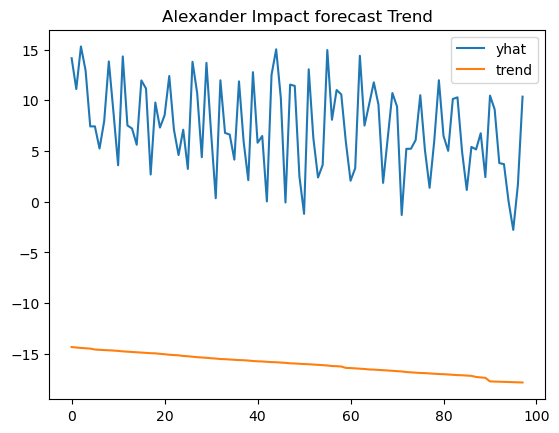

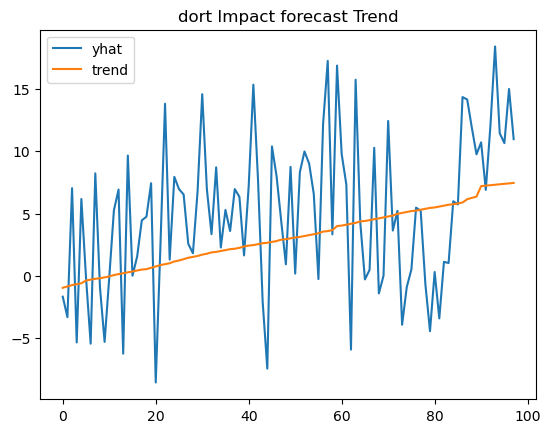

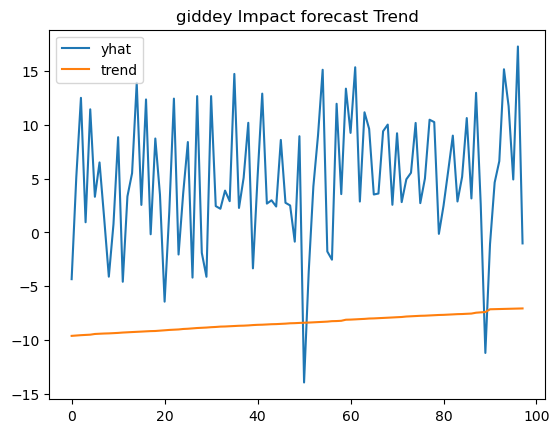

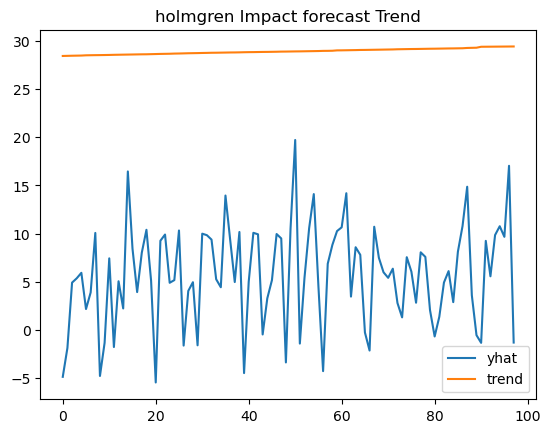

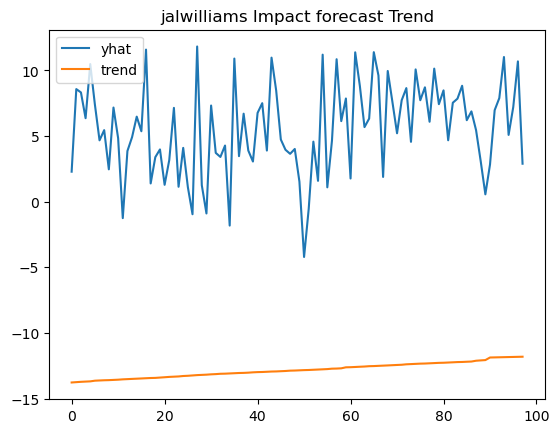

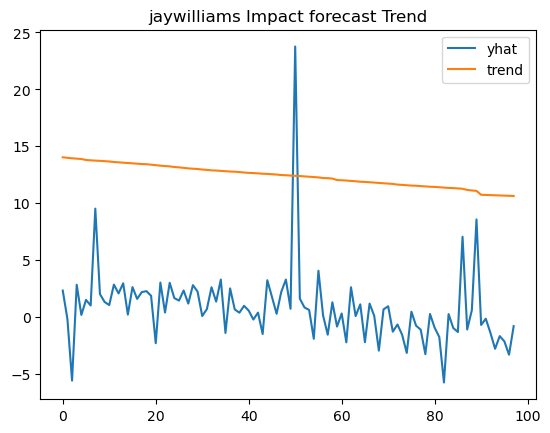

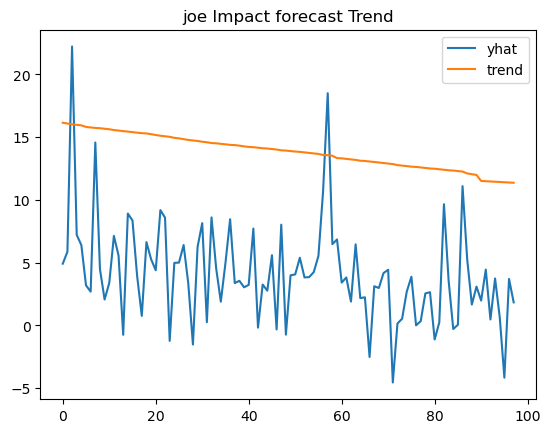

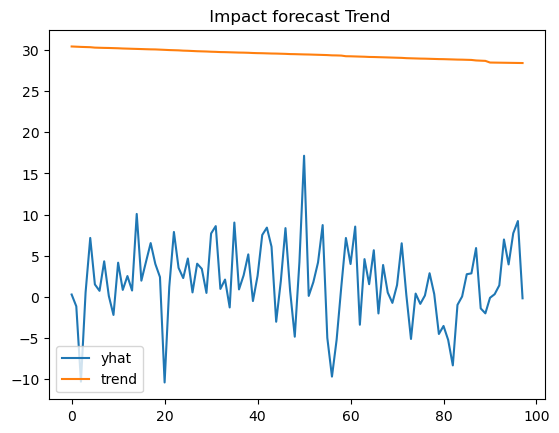

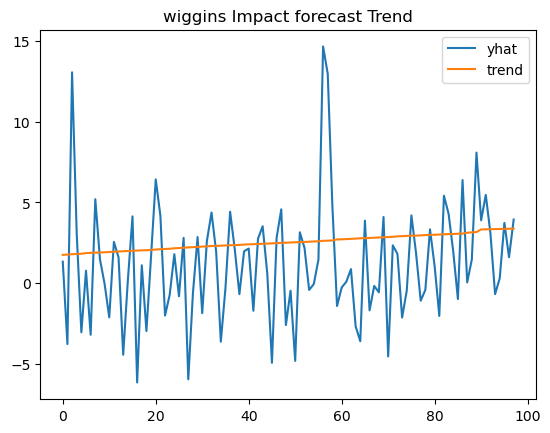

In [7]:
#thunder player predictions
alexander_impact = alexander_df[['date','plusMinus']]
alexander_impact = alexander_impact.rename(columns={'date':'ds','plusMinus':'y'})
alexander_model = Prophet()
alexander_model.fit(alexander_impact)
alexander_future = alexander_model.make_future_dataframe(periods=7,freq='D')
alexander_forecast = alexander_model.predict(alexander_future)
alexander_forecast[['yhat','trend']].plot(legend='Alexander impact trend',title='Alexander Impact forecast Trend')
alexander_trend = pd.concat([alexander_df['player.lastname'], alexander_forecast],axis=1)
display(alexander_trend[['player.lastname','yhat','trend']])

dort_impact = dort_df[['date','plusMinus']]
dort_impact = dort_impact.rename(columns={'date':'ds','plusMinus':'y'})
dort_model = Prophet()
dort_model.fit(dort_impact)
dort_future = dort_model.make_future_dataframe(periods=7,freq='D')
dort_forecast = dort_model.predict(dort_future)
dort_forecast[['yhat','trend']].plot(legend='dort impact trend',title='dort Impact forecast Trend')
dort_trend = pd.concat([dort_df['player.lastname'], dort_forecast],axis=1)
display(dort_trend[['player.lastname','yhat','trend']])

giddey_impact = giddey_df[['date','plusMinus']]
giddey_impact = giddey_impact.rename(columns={'date':'ds','plusMinus':'y'})
giddey_model = Prophet()
giddey_model.fit(giddey_impact)
giddey_future = giddey_model.make_future_dataframe(periods=7,freq='D')
giddey_forecast = giddey_model.predict(giddey_future)
giddey_forecast[['yhat','trend']].plot(legend='giddey impact trend',title='giddey Impact forecast Trend')
giddey_trend = pd.concat([giddey_df['player.lastname'], giddey_forecast],axis=1)
display(giddey_trend[['player.lastname','yhat','trend']])

holmgren_impact = holmgren_df[['date','plusMinus']]
holmgren_impact = holmgren_impact.rename(columns={'date':'ds','plusMinus':'y'})
holmgren_model = Prophet()
holmgren_model.fit(holmgren_impact)
holmgren_future = holmgren_model.make_future_dataframe(periods=7,freq='D')
holmgren_forecast = holmgren_model.predict(holmgren_future)
holmgren_forecast[['yhat','trend']].plot(legend='holmgren impact trend',title='holmgren Impact forecast Trend')
holmgren_trend = pd.concat([holmgren_df['player.lastname'], holmgren_forecast],axis=1)
display(holmgren_trend[['player.lastname','yhat','trend']])

jalwilliams_impact = jalwilliams_df[['date','plusMinus']]
jalwilliams_impact = jalwilliams_impact.rename(columns={'date':'ds','plusMinus':'y'})
jalwilliams_model = Prophet()
jalwilliams_model.fit(jalwilliams_impact)
jalwilliams_future = jalwilliams_model.make_future_dataframe(periods=7,freq='D')
jalwilliams_forecast = jalwilliams_model.predict(jalwilliams_future)
jalwilliams_forecast[['yhat','trend']].plot(legend='jalwilliams impact trend',title='jalwilliams Impact forecast Trend')
jalwilliams_trend = pd.concat([jalwilliams_df['player.lastname'], jalwilliams_forecast],axis=1)
display(jalwilliams_trend[['player.lastname','yhat','trend']])

jaywilliams_impact = jaywilliams_df[['date','plusMinus']]
jaywilliams_impact = jaywilliams_impact.rename(columns={'date':'ds','plusMinus':'y'})
jaywilliams_model = Prophet()
jaywilliams_model.fit(jaywilliams_impact)
jaywilliams_future = jaywilliams_model.make_future_dataframe(periods=7,freq='D')
jaywilliams_forecast = jaywilliams_model.predict(jaywilliams_future)
jaywilliams_forecast[['yhat','trend']].plot(legend='jaywilliams impact trend',title='jaywilliams Impact forecast Trend')
jaywilliams_trend = pd.concat([jaywilliams_df['player.lastname'], jaywilliams_forecast],axis=1)
display(jaywilliams_trend[['player.lastname','yhat','trend']])

joe_impact = joe_df[['date','plusMinus']]
joe_impact = joe_impact.rename(columns={'date':'ds','plusMinus':'y'})
joe_model = Prophet()
joe_model.fit(joe_impact)
joe_future = joe_model.make_future_dataframe(periods=7,freq='D')
joe_forecast = joe_model.predict(joe_future)
joe_forecast[['yhat','trend']].plot(legend='joe impact trend',title='joe Impact forecast Trend')
joe_trend = pd.concat([joe_df['player.lastname'], joe_forecast],axis=1)
display(joe_trend[['player.lastname','yhat','trend']])

wallace_impact = wallace_df[['date','plusMinus']]
wallace_impact = wallace_impact.rename(columns={'date':'ds','plusMinus':'y'})
wallace_model = Prophet()
wallace_model.fit(wallace_impact)
wallace_future = wallace_model.make_future_dataframe(periods=7,freq='D')
wallace_forecast = wallace_model.predict(wallace_future)
wallace_forecast[['yhat','trend']].plot(legend=' impact trend',title=' Impact forecast Trend')
wallace_trend = pd.concat([wallace_df['player.lastname'], wallace_forecast],axis=1)
display(wallace_trend[['player.lastname','yhat','trend']])

wiggins_impact = wiggins_df[['date','plusMinus']]
wiggins_impact = wiggins_impact.rename(columns={'date':'ds','plusMinus':'y'})
wiggins_model = Prophet()
wiggins_model.fit(wiggins_impact)
wiggins_future = wiggins_model.make_future_dataframe(periods=7,freq='D')
wiggins_forecast = wiggins_model.predict(wiggins_future)
wiggins_forecast[['yhat','trend']].plot(legend='wiggins impact trend',title='wiggins Impact forecast Trend')
wiggins_trend = pd.concat([wiggins_df['player.lastname'], wiggins_forecast],axis=1)
display(wiggins_trend[['player.lastname','yhat','trend']])



23:30:30 - cmdstanpy - INFO - Chain [1] start processing
23:30:31 - cmdstanpy - INFO - Chain [1] done processing


,player.lastname,yhat,trend
0,Doncic,-0.569144,-8.230428
1,Doncic,10.033579,-7.899122
2,Doncic,0.007994,-7.773329
3,Doncic,8.828040,-7.724668
4,Doncic,0.291847,-7.650642
...,...,...,...
92,NaN,5.036405,-2.556302
93,NaN,5.727786,-2.531455
94,NaN,14.046102,-2.506607
95,NaN,9.912418,-2.481759


23:30:31 - cmdstanpy - INFO - Chain [1] start processing
23:30:31 - cmdstanpy - INFO - Chain [1] done processing


,player.lastname,yhat,trend
0,Gafford,-5.947306,-13.063329
1,Gafford,-2.872233,-12.472813
2,Gafford,-4.097892,-12.248601
3,Gafford,-2.967987,-12.161869
4,Gafford,-5.206852,-12.029925
...,...,...,...
92,NaN,8.032459,-2.949814
93,NaN,6.983784,-2.905525
94,NaN,6.332646,-2.861236
95,NaN,7.188685,-2.816947


23:30:31 - cmdstanpy - INFO - Chain [1] start processing
23:30:31 - cmdstanpy - INFO - Chain [1] done processing


,player.lastname,yhat,trend
0,Green,1.088000,-27.379000
1,Green,1.346543,-27.760626
2,Green,4.465364,-27.905524
3,Green,-2.005600,-27.961575
4,Green,5.361720,-28.046845
...,...,...,...
92,NaN,-2.609620,-33.914936
93,NaN,-1.809661,-33.943558
94,NaN,-8.016205,-33.972180
95,NaN,-9.332620,-34.000802


23:30:32 - cmdstanpy - INFO - Chain [1] start processing
23:30:32 - cmdstanpy - INFO - Chain [1] done processing


,player.lastname,yhat,trend
0,Hardaway Jr.,0.431517,9.123232
1,Hardaway Jr.,5.793785,8.724225
2,Hardaway Jr.,1.111135,8.572728
3,Hardaway Jr.,3.796353,8.514124
4,Hardaway Jr.,3.671538,8.424970
...,...,...,...
92,NaN,-5.396813,2.289621
93,NaN,0.986254,2.259696
94,NaN,-2.488001,2.229770
95,NaN,-6.496538,2.199845


23:30:32 - cmdstanpy - INFO - Chain [1] start processing
23:30:32 - cmdstanpy - INFO - Chain [1] done processing


,player.lastname,yhat,trend
0,Irving,12.707956,-22.189973
1,Irving,2.080304,-22.216068
2,Irving,3.676998,-22.225976
3,Irving,0.853507,-22.229808
4,Irving,5.161941,-22.235639
...,...,...,...
92,NaN,3.257345,-22.636888
93,NaN,11.802883,-22.638845
94,NaN,0.442513,-22.640802
95,NaN,5.483585,-22.642760


23:30:32 - cmdstanpy - INFO - Chain [1] start processing
23:30:32 - cmdstanpy - INFO - Chain [1] done processing


,player.lastname,yhat,trend
0,Jones Jr.,-1.713741,4.810500
1,Jones Jr.,6.184224,4.896487
2,Jones Jr.,1.914370,4.929135
3,Jones Jr.,8.292540,4.941764
4,Jones Jr.,-2.187646,4.960977
...,...,...,...
92,NaN,6.228700,6.283155
93,NaN,-1.320286,6.289604
94,NaN,9.646829,6.296053
95,NaN,3.419874,6.302502


23:30:32 - cmdstanpy - INFO - Chain [1] start processing
23:30:33 - cmdstanpy - INFO - Chain [1] done processing


,player.lastname,yhat,trend
0,Lively,-14.056019,-1.521793
1,Lively,4.614533,-1.869411
2,Lively,5.096498,-2.001397
3,Lively,5.107698,-2.052454
4,Lively,4.715715,-2.130125
...,...,...,...
92,NaN,-0.201533,-7.475299
93,NaN,-1.576982,-7.501370
94,NaN,-0.367289,-7.527441
95,NaN,-1.243884,-7.553513


23:30:33 - cmdstanpy - INFO - Chain [1] start processing
23:30:33 - cmdstanpy - INFO - Chain [1] done processing


,player.lastname,yhat,trend
0,Washington,11.281827,-14.518354
1,Washington,-6.675259,-13.513060
2,Washington,-9.377751,-13.131363
3,Washington,-7.361456,-12.983710
4,Washington,-6.285824,-12.759090
...,...,...,...
92,NaN,8.235183,2.698870
93,NaN,10.266123,2.774267
94,NaN,8.471919,2.849664
95,NaN,15.857675,2.925061


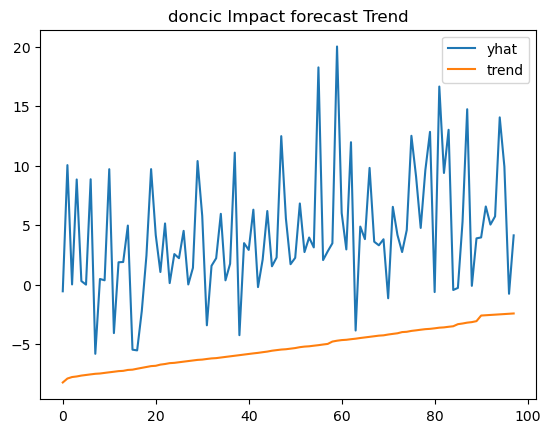

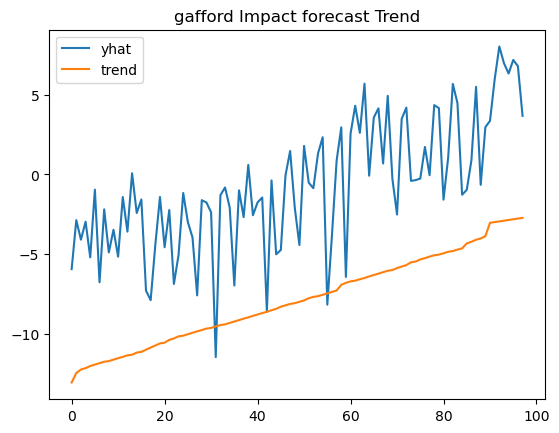

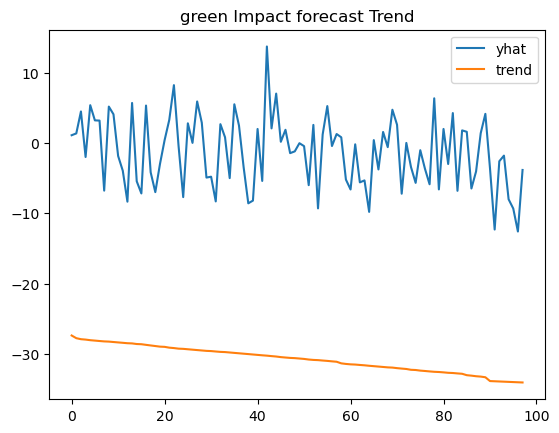

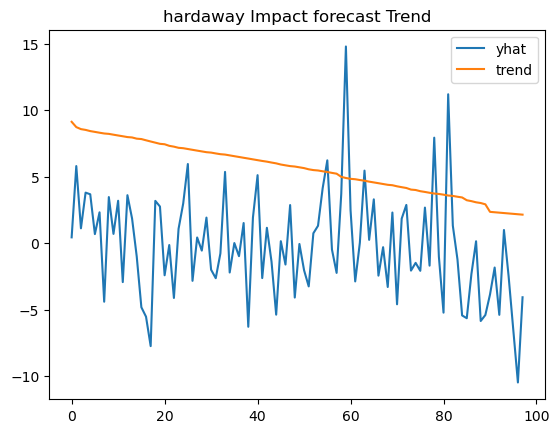

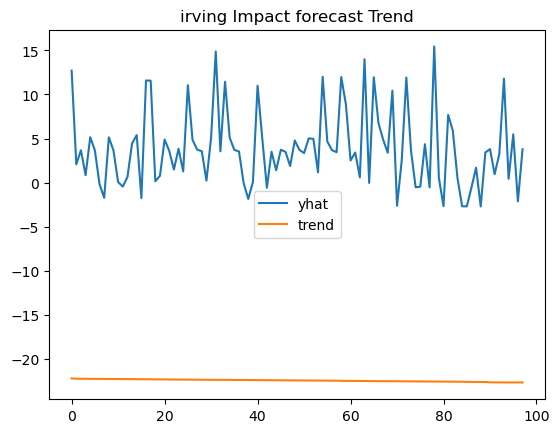

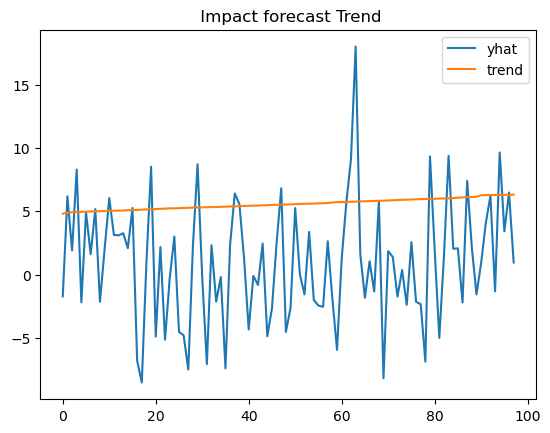

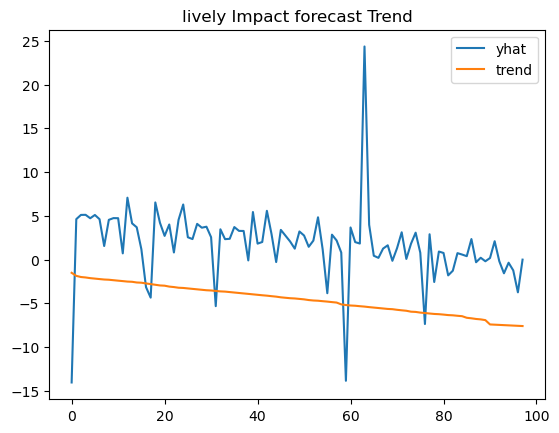

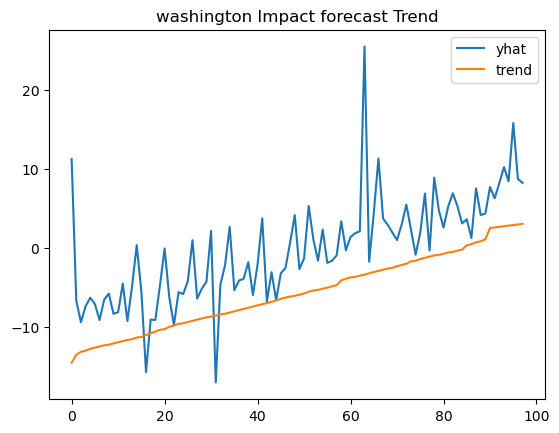

In [8]:
#mavericks player predictions
doncic_impact = doncic_df[['date','plusMinus']]
doncic_impact = doncic_impact.rename(columns={'date':'ds','plusMinus':'y'})
doncic_model = Prophet()
doncic_model.fit(doncic_impact)
doncic_future = doncic_model.make_future_dataframe(periods=7,freq='D')
doncic_forecast = doncic_model.predict(doncic_future)
doncic_forecast[['yhat','trend']].plot(legend='doncic impact trend',title='doncic Impact forecast Trend')
doncic_trend = pd.concat([doncic_df['player.lastname'], doncic_forecast],axis=1)
display(doncic_trend[['player.lastname','yhat','trend']])

gafford_impact = gafford_df[['date','plusMinus']]
gafford_impact = gafford_impact.rename(columns={'date':'ds','plusMinus':'y'})
gafford_model = Prophet()
gafford_model.fit(gafford_impact)
gafford_future = gafford_model.make_future_dataframe(periods=7,freq='D')
gafford_forecast = gafford_model.predict(gafford_future)
gafford_forecast[['yhat','trend']].plot(legend='gafford impact trend',title='gafford Impact forecast Trend')
gafford_trend = pd.concat([gafford_df['player.lastname'], gafford_forecast],axis=1)
display(gafford_trend[['player.lastname','yhat','trend']])

green_impact = green_df[['date','plusMinus']]
green_impact = green_impact.rename(columns={'date':'ds','plusMinus':'y'})
green_model = Prophet()
green_model.fit(green_impact)
green_future = green_model.make_future_dataframe(periods=7,freq='D')
green_forecast = green_model.predict(green_future)
green_forecast[['yhat','trend']].plot(legend='green impact trend',title='green Impact forecast Trend')
green_trend = pd.concat([green_df['player.lastname'], green_forecast],axis=1)
display(green_trend[['player.lastname','yhat','trend']])

hardaway_impact = hardaway_df[['date','plusMinus']]
hardaway_impact = hardaway_impact.rename(columns={'date':'ds','plusMinus':'y'})
hardaway_model = Prophet()
hardaway_model.fit(hardaway_impact)
hardaway_future = hardaway_model.make_future_dataframe(periods=7,freq='D')
hardaway_forecast = hardaway_model.predict(hardaway_future)
hardaway_forecast[['yhat','trend']].plot(legend='hardaway impact trend',title='hardaway Impact forecast Trend')
hardaway_trend = pd.concat([hardaway_df['player.lastname'], hardaway_forecast],axis=1)
display(hardaway_trend[['player.lastname','yhat','trend']])

irving_impact = irving_df[['date','plusMinus']]
irving_impact = irving_impact.rename(columns={'date':'ds','plusMinus':'y'})
irving_model = Prophet()
irving_model.fit(irving_impact)
irving_future = irving_model.make_future_dataframe(periods=7,freq='D')
irving_forecast = irving_model.predict(irving_future)
irving_forecast[['yhat','trend']].plot(legend='irving impact trend',title='irving Impact forecast Trend')
irving_trend = pd.concat([irving_df['player.lastname'], irving_forecast],axis=1)
display(irving_trend[['player.lastname','yhat','trend']])

jones_impact = jones_df[['date','plusMinus']]
jones_impact = jones_impact.rename(columns={'date':'ds','plusMinus':'y'})
jones_model = Prophet()
jones_model.fit(jones_impact)
jones_future = jones_model.make_future_dataframe(periods=7,freq='D')
jones_forecast = jones_model.predict(jones_future)
jones_forecast[['yhat','trend']].plot(legend='jones impact trend',title=' Impact forecast Trend')
jones_trend = pd.concat([jones_df['player.lastname'], jones_forecast],axis=1)
display(jones_trend[['player.lastname','yhat','trend']])

lively_impact = lively_df[['date','plusMinus']]
lively_impact = lively_impact.rename(columns={'date':'ds','plusMinus':'y'})
lively_model = Prophet()
lively_model.fit(lively_impact)
lively_future = lively_model.make_future_dataframe(periods=7,freq='D')
lively_forecast = lively_model.predict(lively_future)
lively_forecast[['yhat','trend']].plot(legend='lively impact trend',title='lively Impact forecast Trend')
lively_trend = pd.concat([lively_df['player.lastname'], lively_forecast],axis=1)
display(lively_trend[['player.lastname','yhat','trend']])

washington_impact = washington_df[['date','plusMinus']]
washington_impact = washington_impact.rename(columns={'date':'ds','plusMinus':'y'})
washington_model = Prophet()
washington_model.fit(washington_impact)
washington_future = washington_model.make_future_dataframe(periods=7,freq='D')
washington_forecast = washington_model.predict(washington_future)
washington_forecast[['yhat','trend']].plot(legend='washington impact trend',title='washington Impact forecast Trend')
washington_trend = pd.concat([washington_df['player.lastname'], washington_forecast],axis=1)
display(washington_trend[['player.lastname','yhat','trend']])


In [9]:
#thunder
alexander_trend = alexander_trend[['player.lastname','trend','yhat','daily']].reset_index().rename(columns={'index':'game'}).fillna('Alexander')
dort_trend = dort_trend[['player.lastname','trend','yhat','daily']].reset_index().rename(columns={'index':'game'}).fillna('Dort')
giddey_trend = giddey_trend[['player.lastname','trend','yhat','daily']].reset_index().rename(columns={'index':'game'}).fillna('Giddey')
holmgren_trend = holmgren_trend[['player.lastname','trend','yhat','daily']].reset_index().rename(columns={'index':'game'}).fillna('Holmgren')
jalwilliams_trend = jalwilliams_trend[['player.lastname','trend','yhat','daily']].reset_index().rename(columns={'index':'game'}).fillna('Jal Williams')
jaywilliams_trend = jaywilliams_trend[['player.lastname','trend','yhat','daily']].reset_index().rename(columns={'index':'game'}).fillna('Jay Williams')
joe_trend = joe_trend[['player.lastname','trend','yhat','daily']].reset_index().rename(columns={'index':'game'}).fillna('Joe')
#Mavs
doncic_trend = doncic_trend[['player.lastname','trend','yhat','daily']].reset_index().rename(columns={'index':'game'}).fillna('Doncic')
gafford_trend = gafford_trend[['player.lastname','trend','yhat','daily']].reset_index().rename(columns={'index':'game'}).fillna('Gafford')
green_trend = green_trend[['player.lastname','trend','yhat','daily']].reset_index().rename(columns={'index':'game'}).fillna('Green')
hardaway_trend = hardaway_trend[['player.lastname','trend','yhat','daily']].reset_index().rename(columns={'index':'game'}).fillna('Hardaway')
irving_trend = irving_trend[['player.lastname','trend','yhat','daily']].reset_index().rename(columns={'index':'game'}).fillna('Irving')
jones_trend = jones_trend[['player.lastname','trend','yhat','daily']].reset_index().rename(columns={'index':'game'}).fillna('Jones')
lively_trend = lively_trend[['player.lastname','trend','yhat','daily']].reset_index().rename(columns={'index':'game'}).fillna('Lively')
washington_trend = washington_trend[['player.lastname','trend','yhat','daily']].reset_index().rename(columns={'index':'game'}).fillna('Washington')

dort_trend

,game,player.lastname,trend,yhat,daily
0,0,Dort,-0.945207,-1.660868,0.506880
1,1,Dort,-0.837510,-3.302627,-8.722175
2,2,Dort,-0.731330,7.045397,5.165091
3,3,Dort,-0.653970,-5.330069,0.506880
4,4,Dort,-0.581161,6.177377,0.506880
...,...,...,...,...,...
93,92,Dort,7.282997,12.066052,4.852530
94,93,Dort,7.319402,18.408624,4.852530
95,94,Dort,7.355806,11.446917,4.852530
96,95,Dort,7.392211,10.656637,4.852530


In [10]:
#thunder team trends
thunder_trends = pd.concat([alexander_trend,dort_trend,giddey_trend,holmgren_trend,jalwilliams_trend,jaywilliams_trend,joe_trend],axis=0).rename(columns={'player.lastname':'name'})
#mavs team trends
mavs_trends = pd.concat([doncic_trend,gafford_trend,green_trend,hardaway_trend,irving_trend,jones_trend,lively_trend, washington_trend],axis=0).rename(columns={'player.lastname':'name'})

In [11]:
#compare teams predictions
thunder_compare = thunder_trends[['game','yhat']].groupby(['game']).mean()
mavs_compare = mavs_trends[['game','yhat']].groupby(['game']).mean()
display(thunder_compare.tail(7))
display(mavs_compare.tail(7))


,yhat
game,
91,5.878553
92,5.002400
93,8.439943
94,5.428987
95,3.335474
96,8.868293
97,3.270653


,yhat
game,
91,1.475070
92,2.822766
93,3.882488
94,3.508564
95,3.098649
96,-0.958287
97,1.611730


C:\Users\nick\AppData\Local\Temp\ipykernel_25740\4149619144.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  mavs_compare['yhat'].loc[90:].plot(legend=True,label='Mavericks',).set_xticklabels((' ','game 1','game 2','game 3','game 4','game 5','game 6','game 7'))


[Text(89.0, 0, ' '),
 Text(90.0, 0, 'game 1'),
 Text(91.0, 0, 'game 2'),
 Text(92.0, 0, 'game 3'),
 Text(93.0, 0, 'game 4'),
 Text(94.0, 0, 'game 5'),
 Text(95.0, 0, 'game 6'),
 Text(96.0, 0, 'game 7'),
 Text(97.0, 0, ''),
 Text(98.0, 0, '')]

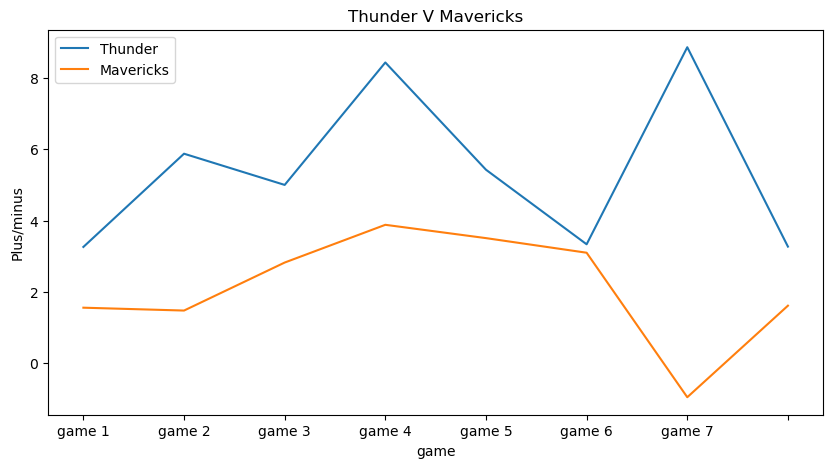

In [12]:
#plot teams
thunder_compare['yhat'].loc[90:].plot(title='Thunder V Mavericks',legend=True, label='Thunder', ylabel='Plus/minus',figsize=[10,5])
mavs_compare['yhat'].loc[90:].plot(legend=True,label='Mavericks',).set_xticklabels((' ','game 1','game 2','game 3','game 4','game 5','game 6','game 7'))